
<div class="alert alert-info">

# SQL Learning Studio Python Assignment


<br>
<br>

    
**Author:**  Bryan Hancock, DCS    
**Last Edit:**  1/6/2024
    
modified from Chicago Crimes assignment in MSDS420 to keep formatting and images of command line items

<br>

</div>

# Assignment Description: 
In this excercise you will create Python code in a Jupyter Notebook to retrieve data from the PostgreSQL database you have been working with in the SQL Learning Studio.
 
# MSDS 420 Students Assignment Deliverables
Once you complete the final query, load it into a dataframe and screenshot the results of printing the dataframe.


# Assignment Outline:
- **Using the command line python package manager:** 
    - use pip to install psycopg2 and verify the installation
    - install pandas using conda
- **accessing the command line from inside notebook~**
    - you can send commands to the command line directly from a jupyter notebook code cell
    - we will use this method to send the conda list command to verify that pandas is installed
- **Using Jupyter Notebook:**
    - Import the packages into your pythyon code
    - Create a database connection
    - Run a query against the database connection
    - Print the results using python's print() function
    - Load the results into a pandas dataframe
    - Print the dataframe using the dataframe's built in method

# Python Packages
Packages you need to Connect **PostgreSQL** server and use dataframes in python:

1. **psycopg2:** the PostgreSQL database connector
2. **pandas:** adds support for dataframes and many built in functions to run against the dataframe

We are going to be installing 1 package using pip and the other using conda so you can become fimilliar with both package managers. There is not a huge difference between the package managers, but it is good to know both systems since some packages are not avaliable in one package manager. Also, since these package managers point to different repositories, versions may be different, which can help if a new update introduces issues into your programming envrionment.

# Use pip to install psycopg2: 
**Documentation:** https://pip.pypa.io/en/stable/cli/pip_install/
1. open Anaconda Navigator
2. click the "Launch" button under the tile titled CMD.exe Prompt to open the command line
3. issue the command below and press enter: (also shown in the screenshot towards the middle of the screen)
```pip install psycopg2```

5. if prompted to allow updates or dependency installations, enter the reuqired command
6. verify the installation by issuing the following command and pushing enter: (see second screenshot below)
```pip show psycopg2```

7. once you have verified the installation, leave the command line window open and go to the next section to install pandas using conda install


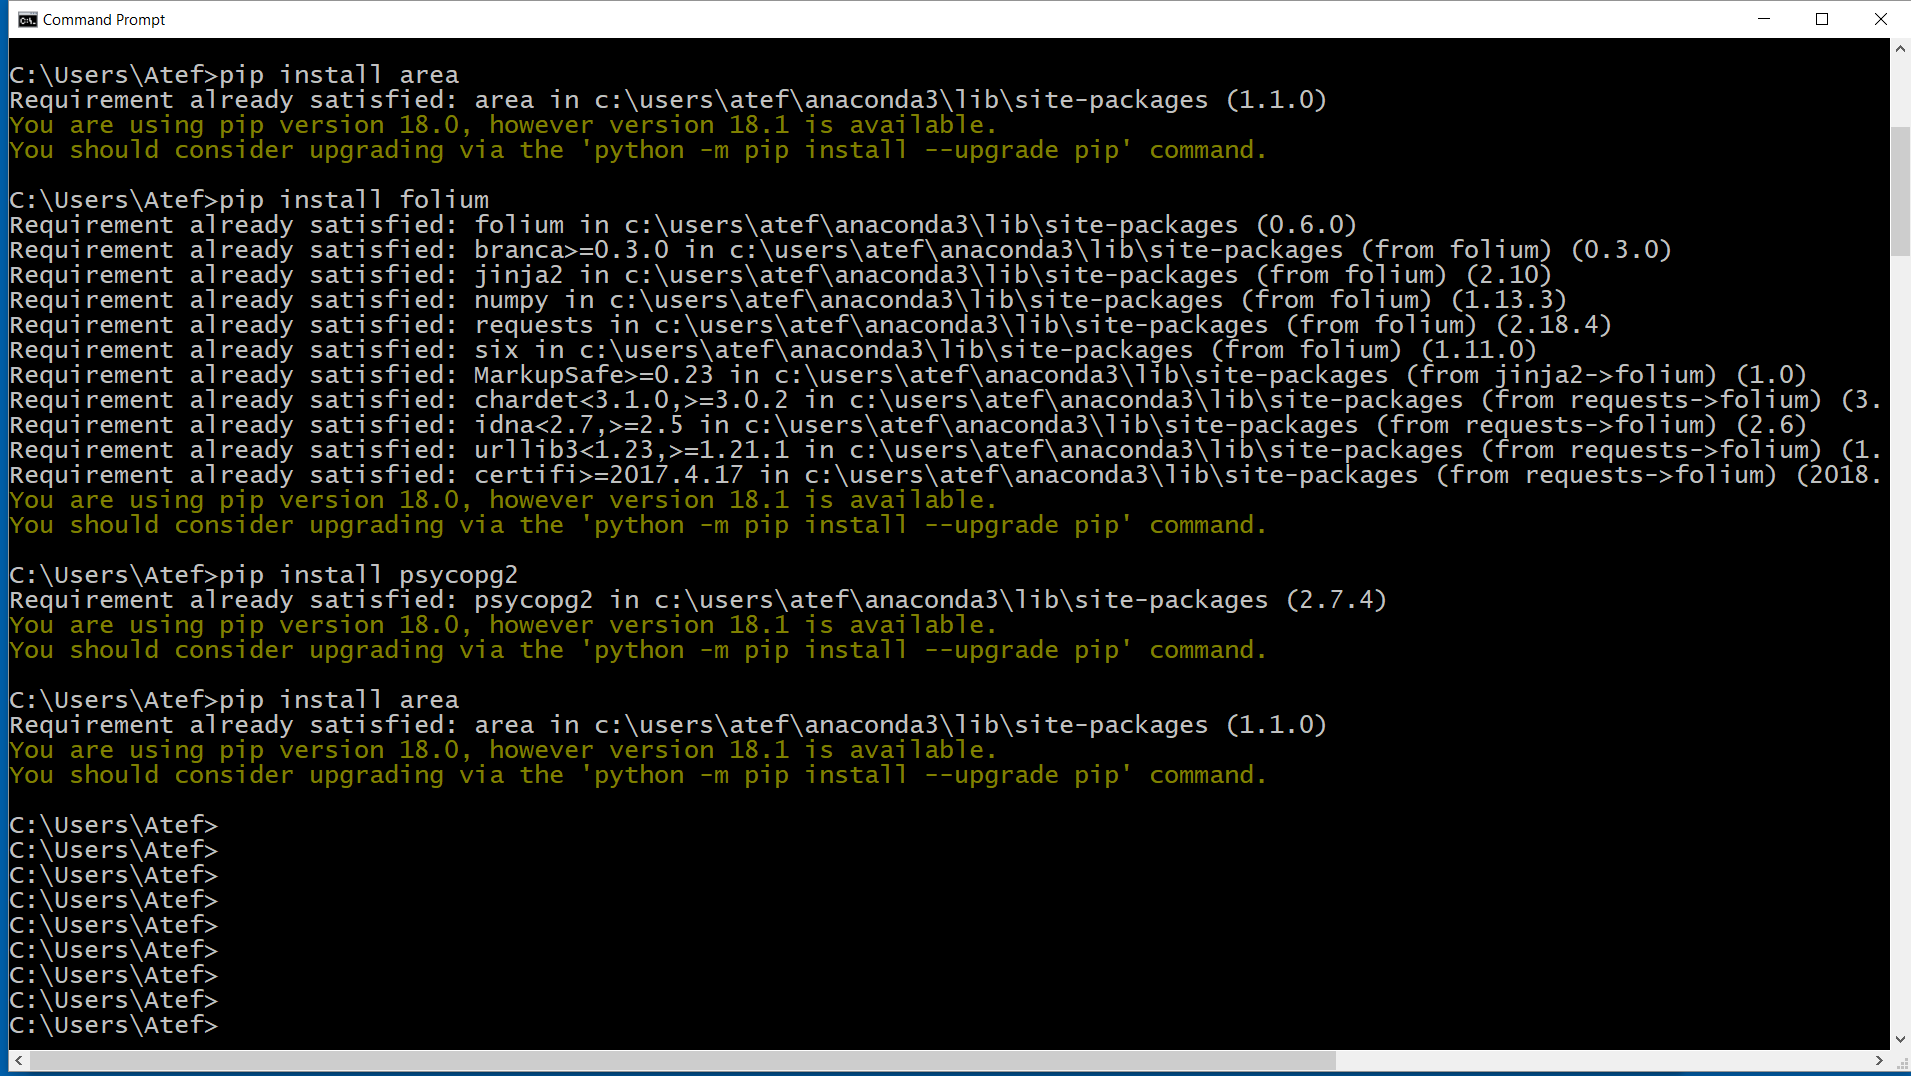

Execute the following **pip show** command from the command line to get info about any package you installed. Make sure that the packages got installed into Anaconda library since we are using Anaconda tool; please see below the pakcage info


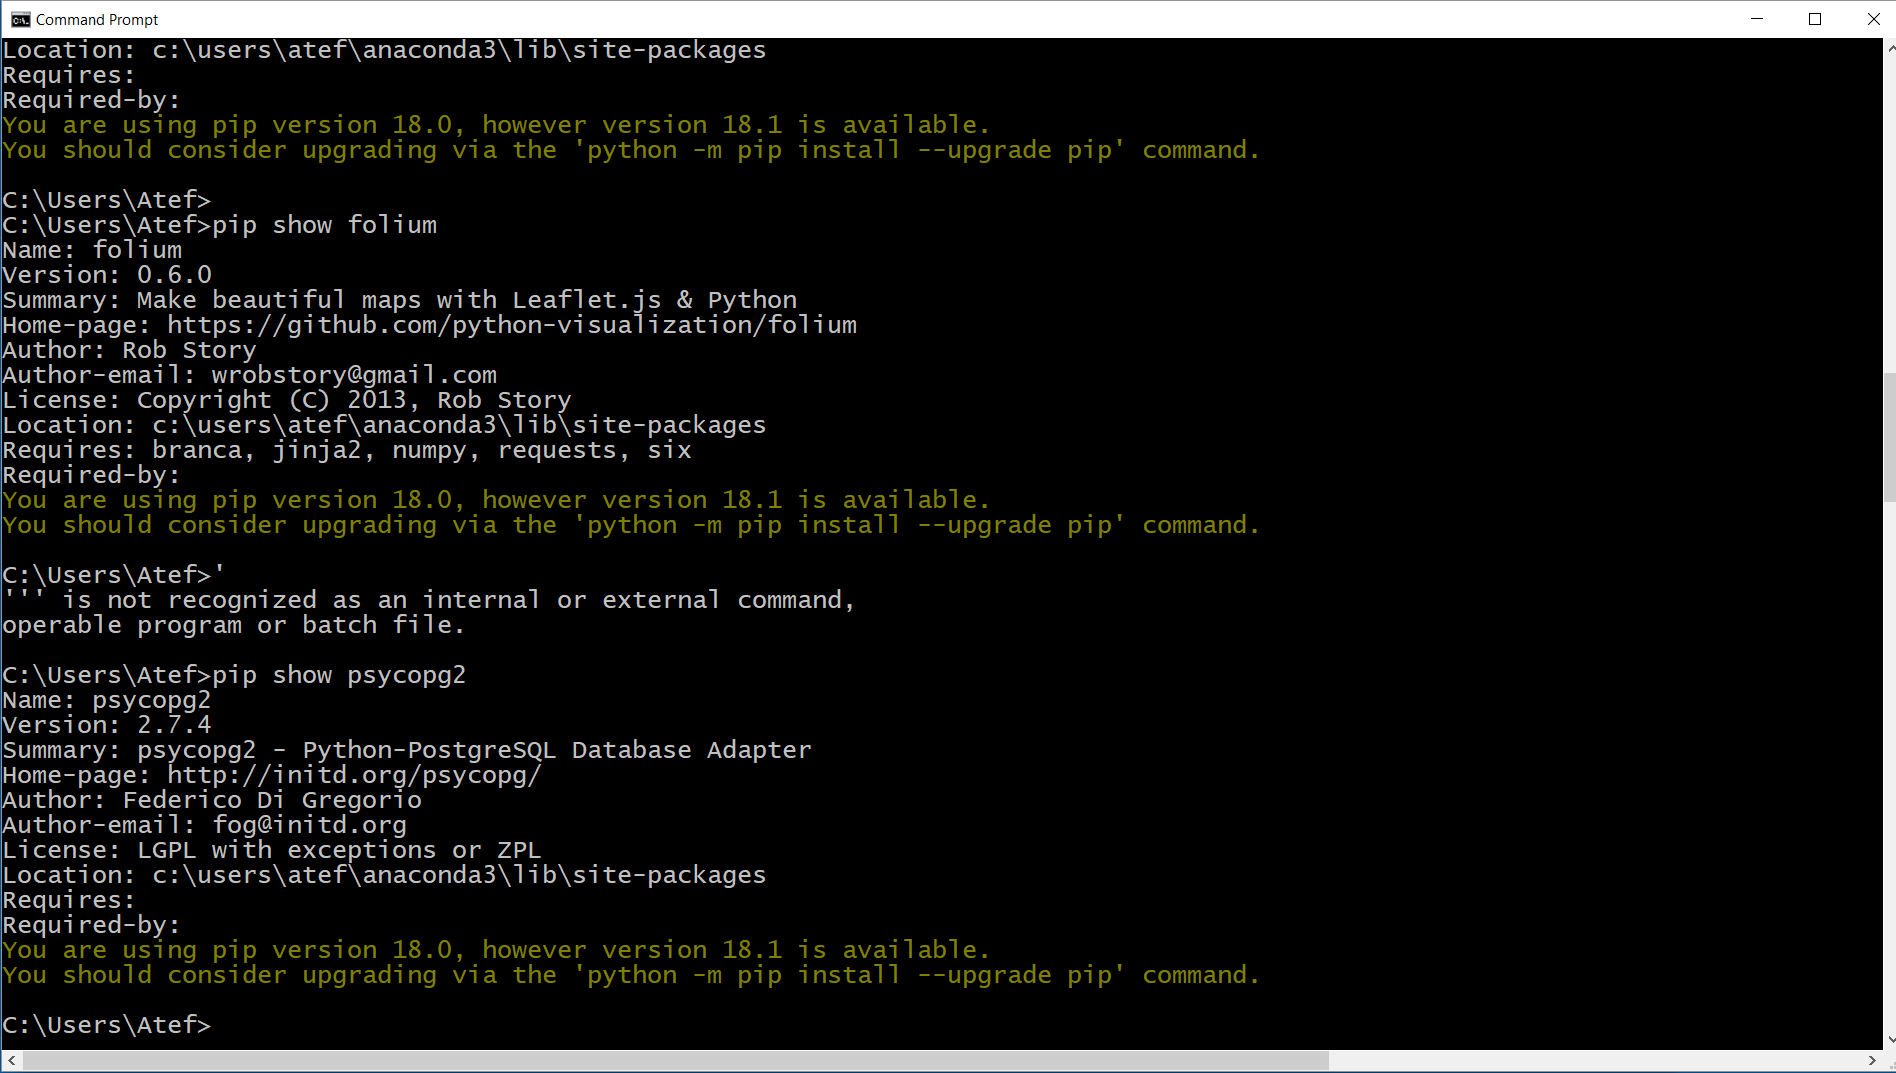

# Use conda install to install pandas: 
**Documentation:** https://anaconda.org/anaconda/pandas
- The conda package manager often requires you to accept any planned changes, if you see the prompt below this message, make sure you type y and press enter:
```Proceed ([y]/n)?```

1. update conda with the command:
```conda update -n base -c defaults conda```

2. grant permission if it is requested
3. after updating conda, issue the command below to install pandas:
```conda install anaconda::pandas```

4. grant permission if it is requested
5. close the command line window


# Sending commands directly from Jupyter to the command line 
**Documentation:** https://docs.conda.io/projects/conda/en/latest/commands/list.html
- We can send commands directly to the command line by adding the exclimation point character as the first character in the command

1. in the code cell directly below this instruction block, type:
```!conda list pandas```

2. click the play (triangle) button to run the code in the cell

In [10]:
# type the command from the instuction block above into this code cell
!pip list |  grep pandas


pandas                    2.3.0


In [11]:
# Bryan: The code below loads the packages into your python project
#        so they will be active. If you do not run this cell, then
#        you will likely see errors such as
# NameError: name 'psycopg2' is not defined

# the as keyword creates an alias that allows you to swap out the word pandas with pd when
# calling pandas functions
import psycopg2
import pandas as pd



# Building the Connection
**Documentation:** https://www.psycopg.org/docs/module.html
- In the code block below, we will create a python variable called **db_connection** and load it with the data that is returned from the **psycopg2.connect()** function
- python uses **on the fly** data typing, which means it will look at the data we are trying to store in a varaible and decide what data type to use
- the connect() function returns a special data type called a class, which is an object that allows you to store multiple variables and functions that can operate on the stored variables
    - a person class may contain the variables: ID, Name, DOB and have functions to read and print the values stored in each variable as well as a write function can change the data stored in each variable.
    - There is a lot to learn about classes and objects, but for this example you really only need to know that the variables we are working with may have functions built into them that we can use
- The psycopg2.connect() function can take in the following parameters:
    - **host:** database host address (defaults to UNIX socket if not provided)
    - **port:** connection port number (defaults to 5432 if not provided)    
    - **dbname:** the database name (database is a deprecated alias)
    - **user:** user name used to authenticate
    - **password:** password used to authenticate
- The order does not matter since you are listing the parameter name and then setting it equal to some value
 # creating a cursor
 - a cursor is used to hold data from database qeuries
 - once we build our connection, we will create a python variable formatted as a db_connection.cursor() object to store the data returned by our queries


In [18]:
# build the connnection using the input parameters shown in double quotes
db_connection = psycopg2.connect(host="localhost", port="5432", 
                                 dbname="tinycollege", user="postgres", password="sql")

# create the cursor object so we can execute queries and store the data projections that those queries return
cursor = db_connection.cursor()

# Executing sql and retreiving data
**Documentation:**https://www.psycopg.org/docs/usage.html#passing-parameters-to-sql-queries
- inside of the cursor object, we have access to the execute function, which will allow us to send SQL queries in as string values

- we can send in the values contained inside of variables using special string operations designed to be used with python SQL connectors (please see the link in the heading for the full rundown)

- to send in values stored inside of other python variables, simply replace the item with a %s, then send a second parameter to execute.() that contains the name of the python variable:

```python
    v_table_name = "student"
    
    cursor.execute("select column_name from information_schema.columns where table_name = %s;", [v_table_name,])
```

- the **cursor.execute()** function will look at the data inside v_table_name and decide what data type it is, then it will write the query by replacing the %s with the data inside of the variable using the expected format

- the **cursor.fetchall()** function will put the data projection into a python variable so you can access the data in your code

- in the next code block, we will be querying a special database schema inside PostgreSQL that stores metadata to get the column names for the student table, then printig those column names using Python's print() function

# A note about the .execute() function:
- **.execute()** can only accept "sequence" type variables.
- We are not going to cover this concept in depth, other to explain the major differneces between 2 of the "sequence" data types we can use:
    - **LIST:**  a comma seperated group wrapped in square braces. Data inside the list can be changed by your program
```python
     v_table_names = ["student",]
```
    - **Tuple:**  also a comma seperated group, but it is wraped in parenthesis. Data in a Tuple can't be changed after it is created
```python
     v_table_names = ("student",)
```

In [19]:
v_my_list = ["truck", "car", "van"]
print(v_my_list)

#list items are indexed from 0 to n
v_my_list[0] = "boat"
v_my_list[2] = "mini van"

print(v_my_list)

['truck', 'car', 'van']
['boat', 'car', 'mini van']


In [20]:
v_my_list = ("truck", "car", "van")
print(v_my_list)

# the error you get when you try to assign a new value to a tuple
v_my_list[0] = "boat"
v_my_list[2] = "mini van"

('truck', 'car', 'van')


TypeError: 'tuple' object does not support item assignment

In [21]:
# load variable called v_table_name with a list of strings that contain the values: 
    # student, professor
v_table_names = ["student","professor"]

# call cursor.execute, send in query string and a list of table names. The query will replace the first %s with
    # the first item in the list, the second %s will be replaced with the second item in the list
    
# the query that runs on the database will contain the where clause shown under this comment
    # becuase execute() will determine what type of data we are sending:
    
        # where table_name = 'student' or table_name = 'professor'
        
cursor.execute("select column_name from information_schema.columns where table_name = %s or table_name = %s;",
               v_table_names)

# use cursor.fetchall() load the data projection into a python variable
v_data_projection = cursor.fetchall()

# use the python print() function to output the results
print(v_data_projection)

[('emp_num',), ('stu_num',), ('stu_dob',), ('stu_hrs',), ('stu_gpa',), ('advisor_num',), ('stu_lname',), ('stu_fname',), ('stu_init',), ('stu_transfer',), ('dept_code',), ('stu_class',), ('dept_code',), ('prof_office',), ('prof_extension',), ('prof_high_degree',), ('stu_phone',)]


In [22]:
# load variable called v_table_name with a tuple of strings that contain the values: 
    # student, professor
v_table_names = ("student","professor")
cursor.execute("select column_name from information_schema.columns where table_name = %s or table_name = %s;", 
               v_table_names)

# load the data projection into a python variable so we can work with the cursor
v_data_projection = cursor.fetchall()

# use the python print() function to output a header. Uses the \n inside the string to create a new line
# then printing the results
print("\n================= using python print function =================\n")
print(v_data_projection )



================= using python print function =================

[('emp_num',), ('stu_num',), ('stu_dob',), ('stu_hrs',), ('stu_gpa',), ('advisor_num',), ('stu_lname',), ('stu_fname',), ('stu_init',), ('stu_transfer',), ('dept_code',), ('stu_class',), ('dept_code',), ('prof_office',), ('prof_extension',), ('prof_high_degree',), ('stu_phone',)]


# Using the **pandas.DataFrame()** function 
**Documentation:**https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- remember that we aliased pandas with pd, so we can replace pandas. with pd. to run any of the built in functions
- pandas.DataFrame() input parameters we will be using are (see link in header for other input parameters):
    - **data:** the variable that you stored your data projection into using the fetchall() function
    - **columns:** optional; a "sequence" data type that contains a list of column names, listed in order

In [23]:
# load our data projection into a pandas dataframe called df
df = pd.DataFrame(data = v_data_projection)

# printing a header and using built in function to output formatted
print("\n================= using built in dataframe print function =================\n")
print("the first row in the index that pandas assigned to our data frame\n")
print("the second column is the list of column names we queried from the database schema")
df


================= using built in dataframe print function =================

the first row in the index that pandas assigned to our data frame

the second column is the list of column names we queried from the database schema


,0
0,emp_num
1,stu_num
2,stu_dob
3,stu_hrs
4,stu_gpa
5,advisor_num
6,stu_lname
7,stu_fname
8,stu_init
9,stu_transfer


In [24]:
# load our data projection into a pandas dataframe called df
df = pd.DataFrame(data = v_data_projection, columns = ["my_custom_column_names",])

# printing a header and using built in function to output formatted
print("\n================= using built in dataframe print function =================\n")
print("the first row in the index that pandas assigned to our data frame\n")
print("the second column is the list of column names we queried from the database schema")
df


================= using built in dataframe print function =================

the first row in the index that pandas assigned to our data frame

the second column is the list of column names we queried from the database schema


,my_custom_column_names
0,emp_num
1,stu_num
2,stu_dob
3,stu_hrs
4,stu_gpa
5,advisor_num
6,stu_lname
7,stu_fname
8,stu_init
9,stu_transfer


# Hints for writing queries in Python:
- **Start with 1 or 2 tables and build the query up checking for mistakes often!**
- You can store a query string in a python variable:
```python
    v_query = "select * from student where student.stu_gpa > 2.0;"
    cursor.execute(v_query)
```
- For long queries that would run off the page when written as a single line, you can use use 3 single quotes together to open a multi-line string, build your query, then close the string with 3 more single quotes:
```python
    v_query = '''select * 
                 from student
                 where student.stu_gpa > 2.0;'''
    cursor.execute(v_query)
```
- You can get the column names directly from the cursor using the cursor.description attribute (since it does not have a () at the end, it is not a function) 
**Documentation:** https://www.psycopg.org/docs/cursor.html
    - desc[0] is the index where the list of column names is stored in the description attribute
    - must be executed after the cursor is executed but before the cursor is closed
    - code below found at: https://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor
    - runs a for loop to unload all of the column names found in the [0] index of the .descripton attribute
```python
    v_col_names = [desc[0] for desc in cursor.description]
```
- SQL does not care about extra spaces, tabs, or other weird formatting choices 99.99% of the time, so you can just copy/paste without worrying about the format in almost every case
# Writing queries in python is difficult
- Python is not designed to provide quick feedback and your query errors don't always provide as much detail as they would inside of a dedicated database interface   
- You should always use a database interface tool to write your qeuries, once you know they are working, paste them as multi-line strings into a variable
- You can connect pgAdmin4 to any PostgreSQL database that you have been granted access to using the connection variables to determine the host, database name, user name, ect.
- There are many **free and open source** database interface tools. 
    - Some are purpose built for a database (like pgAdmin4), others can connect to many different databases (like dbeaver commmunity edition). 
    - These tools share many features, but may do one or 2 things better than all the other tools, so if you are trying to accomplish a specfic task in a database and your tool is not working, look around for one that can get the job done

In [25]:
# writing a query using the hints

# qeury from database interface tool can be pasted as multiline string
# even if you include the -- to create single line comments in your SQL
# but you can't include the %s anywhere where you don't want a replacement
# to occur
v_query = '''
select * 
from student
-- uses the string replacement format to send in a variable
-- instead of using a static value for the where clause:
where student.stu_gpa > %s;'''

# execute query string; sending in value of 2 for replacement in where clause
cursor.execute(v_query, [2,])

# save column names to list variable
v_col_names = [desc[0] for desc in cursor.description]

print("\n================= notice that the v_col_names print is wrapped in square brackets [] =================\n")
print(v_col_names)
print("\n")

# functions that return data can be treated like they are the data, so instead of loading the
    # data projection into a variable, we can just fetch the data into the DataFrame() function's
    # data parameter directly
    
# NOTE: Do not do this if you know you will need to create a bunch of data frames using the same 
    # baseline data projection, especially if you are working in a PRODUCTION envrionment!
    # cursor.fetchall() will empty itself until you run another execute() statement, meaning that
    # you will be wasting resources by rerunning a query that you could have just saved into a
    # python variable if you know you will want to go back to a fresh copy of the exact same data set
df = pd.DataFrame(data = cursor.fetchall())
df


================= notice that the v_col_names print is wrapped in square brackets [] =================

['stu_num', 'stu_lname', 'stu_fname', 'stu_init', 'stu_dob', 'stu_hrs', 'stu_class', 'stu_gpa', 'stu_transfer', 'dept_code', 'stu_phone', 'advisor_num']




,0,1,2,3,4,5,6,7,8,9,10,11
0,321452,Bowser,William,C,1972-02-12,42.0000,So,2.8400000,0,BIOL,2134,110
1,324257,Smithson,Anne,K,1977-11-15,81.0000,Jr,3.2700000,1,CIS,2256,162
2,324258,Brewer,Juliette,,1966-08-23,36.0000,So,2.2600000,1,ACCT,2256,105
3,324269,Oblonski,Walter,H,1973-09-16,66.0000,Jr,3.0900000,0,CIS,2114,209
4,324273,Smith,John,D,1955-12-30,102.0000,Sr,2.1100000,1,ENG,2231,160
5,324274,Katinga,Raphael,P,1976-10-21,114.0000,Sr,3.1500000,0,ACCT,2267,114
6,324291,Robertson,Gerald,T,1970-04-08,120.0000,Sr,3.8700000,1,EDU,2267,122
7,324299,Smith,John,B,1983-11-30,15.0000,Fr,2.9200000,0,ACCT,2315,301


In [26]:
v_query = '''
select * 
from student
-- uses the string replacement format to send in a variable
-- instead of using a static value for the where clause:
where student.stu_gpa > %s;'''

# execute query string; sending in value of 2 for replacement in where clause
# and saving the results into a python variable
cursor.execute(v_query, [2,])
v_data_projection = cursor.fetchall()

# save column names to list variable
v_col_names = [desc[0] for desc in cursor.description]
    
# remember that v_col_names is already a list, meaning it already contains square brackets, so we leave them off here
df_col_names = pd.DataFrame(data = v_data_projection, columns = v_col_names)
df_col_names

,stu_num,stu_lname,stu_fname,stu_init,stu_dob,stu_hrs,stu_class,stu_gpa,stu_transfer,dept_code,stu_phone,advisor_num
0,321452,Bowser,William,C,1972-02-12,42.0000,So,2.8400000,0,BIOL,2134,110
1,324257,Smithson,Anne,K,1977-11-15,81.0000,Jr,3.2700000,1,CIS,2256,162
2,324258,Brewer,Juliette,,1966-08-23,36.0000,So,2.2600000,1,ACCT,2256,105
3,324269,Oblonski,Walter,H,1973-09-16,66.0000,Jr,3.0900000,0,CIS,2114,209
4,324273,Smith,John,D,1955-12-30,102.0000,Sr,2.1100000,1,ENG,2231,160
5,324274,Katinga,Raphael,P,1976-10-21,114.0000,Sr,3.1500000,0,ACCT,2267,114
6,324291,Robertson,Gerald,T,1970-04-08,120.0000,Sr,3.8700000,1,EDU,2267,122
7,324299,Smith,John,B,1983-11-30,15.0000,Fr,2.9200000,0,ACCT,2315,301


# Using PGAdmin4 and Python, write a query and view the results

- Using what you have learned, write a qeury that returns the data projection that contains the fields described below for all course enrollments:
    - student number, student first name , middle initial, last name,
    - the course code, course name, and class time for each class
    - the professor's employee number, first name, middle initial, last name, and employee department for the course instructor
    - the course code and name for any **prereqs** that need to be taken before enrolling each course, leave blank if none exist

- **HINT: I used the following tables to solve this problem:**
    - enroll
    - class
    - student
    - employee
    - department
    - course
    - prereq

- Load the data projection as a data frame with column names and output the formatted table 

- **There should be 6 rows in the data projection**

<div class="alert alert-block alert-danger"> 
<h2>MSDS 420 students will need to save a screenshot of the output and code used to complete this assignment.</h2>

In [2]:
# build your query and output in this cell


